In [376]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import scipy.stats as st
%matplotlib inline

def init(filename):
    file=sio.loadmat(filename) #On charge le fichier
    Nbobjets = int(max(file['objs_link'][3]))
    print("On a tracqué "+str(Nbobjets)+" particules")
    return file,Nbobjets

In [377]:
file, Nb=init("results/andre_2_1.mat")
frequence=100
def take(i):
    """La fonction qui tracque la particule i"""
    theta=file['objs_link'][8,:][np.where(file['objs_link'][5,:]==i)]
    dureetrajectoire=theta.shape[0]
    print("Trajectory acquired for particle "+str(i))
    T=np.arange(dureetrajectoire)/frequence
    if dureetrajectoire>0:
        return theta-theta.mean(),T,dureetrajectoire
    else:
        return [0],T,dureetrajectoire

On a tracqué 3 particules


In [405]:
theta,T,N=take(3)

Trajectory acquired for particle 3


In [406]:
thetajump=theta[1:]-theta[:-1]
thetajump*=np.abs(thetajump)>1
#thetajump[np.where(thetajump!=0)]/=np.abs(thetajump[np.where(thetajump!=0)])
thetajumped=np.zeros_like(theta)
Pos=False
Jump=False
Last=False
for i in range(N-2):
    if not Jump and thetajump[i]>0:
        Pos=True
        Jump=True
    elif not Jump and thetajump[i]<0:
        Jump=True
    elif Jump and thetajump[i]!=0:
        Last=True
        Jump=False
        Pos=False
    if Pos:
        thetajumped[i+1]=1
        thetajumped[i+2]=1
        First=False
    elif Jump:
        thetajumped[i+1]=-1
        thetajumped[i+2]=-1
        First=False
    if Last:
        thetajumped[i+1]=0
        Last=False
theta-=thetajumped*np.pi

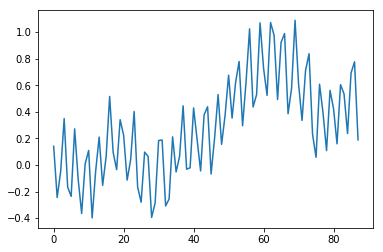

In [407]:
#plt.plot(thetajump[:100])
#plt.plot(thetajumped[:100])
plt.plot(theta)

In [408]:
auto=autocorr(theta)

In [399]:
def autocorr(x,formsd=False):
    fftx = np.fft.fft(x, n=(x.shape[0]*2-1), axis=0)
    cfftx=np.conjugate(fftx)
    ret = np.real(np.fft.ifft(fftx*cfftx, axis=0))
    result = np.fft.fftshift(ret, axes=0)
    result = np.correlate(x, x, mode='full')
    if formsd:
        N=result.size//2+1
        return result[result.size//2:]/(N-np.arange(0,N))
    return result[result.size//2:]

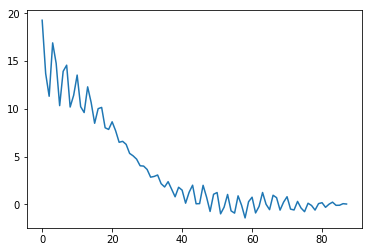

In [400]:
plt.plot(auto)